<a href="https://colab.research.google.com/github/princeKike27/Next-Buyers-K-Classifier/blob/main/Next_Buyers_K_Classifier_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Next Buyers *K* Classifier

For this project I analyzed data from patients that have been prescribed with FMs. By using a Logistic Regression Algorithm I created a next-buyers classifier that based on patient features like its age, sex, diagnosis, city and type of product will classify a patient as a buyer or non buyer.


Throught the project you will be able to find:

- Data cleaning and standardization.
- Analysis of relevant features to build the model.
- Logistic Regression Model for patient classification.
- Analysis of model's performance.
- Model testing.


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load data files

# sales df
df_sales = pd.read_csv(
    'https://raw.githubusercontent.com/princeKike27/Khiron-Next-Buyers-FM/main/Compras_FMs.csv',\
    sep=';')

# procedures df
df_procedures = pd.read_csv(
    'https://raw.githubusercontent.com/princeKike27/Next-Buyers-K-Classifier/main/Procedimientos_FMs_V2.csv',\
    sep=';')

In [ ]:
# check procedures df
df_procedures.head()

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede,Tipo Examen
0,26928,19059029,13/09/1948,73,M,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,NaN
1,26806,390646,1/08/1934,87,M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),G530,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,Primera vez
2,26846,41595666,20/09/1953,68,F,CAJICÁ,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,NaN
3,26861,41499724,20/08/1950,71,F,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,NaN
4,26956,52863476,17/09/1981,40,F,BOGOTÁ D.C.,FIBROMIALGIA,M797,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,2,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,Primera vez


In [ ]:
# check sales df
df_sales.head()

,ingreso,cedula,fecha_oc
0,26806,390646,2020-03-19
1,26793,13352962,2020-03-19
2,26928,19059029,2020-03-19
3,26891,31259698,2020-03-19
4,26720,41453437,2020-03-19


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Procedures FMs

In [ ]:
# procedures df
df_procedures.head()

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede,Tipo Examen
0,26928,19059029,13/09/1948,73,M,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,NaN
1,26806,390646,1/08/1934,87,M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),G530,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,Primera vez
2,26846,41595666,20/09/1953,68,F,CAJICÁ,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,NaN
3,26861,41499724,20/08/1950,71,F,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,NaN
4,26956,52863476,17/09/1981,40,F,BOGOTÁ D.C.,FIBROMIALGIA,M797,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,2,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,Primera vez


In [ ]:
# check shape of df
df_procedures.shape

(35187, 20)

In [ ]:
# check column types
df_procedures.dtypes

Ingreso               int64
DocPaciente          object
Fecha Nacimiento     object
Edad                  int64
Sexo                 object
CiudadMunicipio      object
Diagnostico          object
CodigoDiagnostico    object
Plan                 object
Tipo Plan            object
FechaIngreso         object
FechaFormulacion     object
CodProducto          object
Cantidad              int64
DocMedico             int64
NombreMedico         object
Especialidad         object
Plan/Servicio        object
Sede                 object
Tipo Examen          object
dtype: object

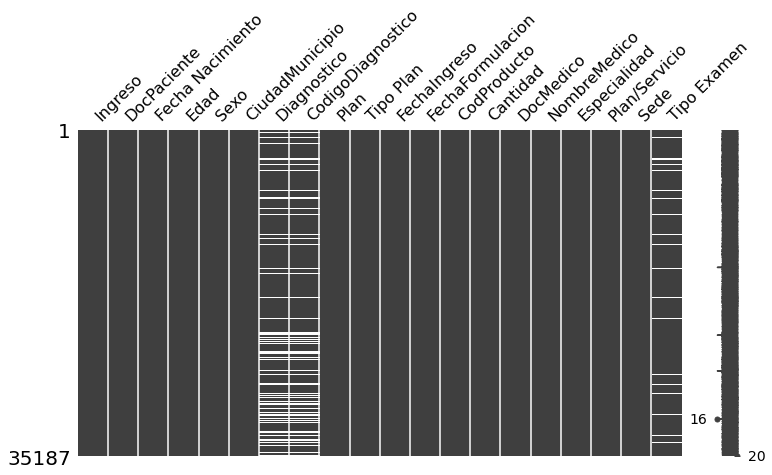

In [ ]:
# check for missing values
import missingno as msg

msg.matrix(df_procedures, figsize=(12, 6))

In [ ]:
# find number of missing values in 'Diagnostico', 'CiudadMunicipio' and 'Tipo Examen'

na_diagnostic = df_procedures['Diagnostico'].isna().sum()
na_city = df_procedures['CiudadMunicipio'].isna().sum()
na_exam = df_procedures['Tipo Examen'].isna().sum()

print(f'Missing Values in Diagnostico: {na_diagnostic}')
print(f'Missing Values in CiudadMunicipio: {na_city}')
print(f'Missing Values in Tipo Examen: {na_exam}')

Missing Values in Diagnostico: 6426
Missing Values in CiudadMunicipio: 12
Missing Values in Tipo Examen: 2076


In [ ]:
# drop na values of CiudadMunicipio
df_procedures = df_procedures.dropna(subset=['CiudadMunicipio'])

# check shape
df_procedures.shape

(35175, 20)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### GroupBy of Relevant Features


In [ ]:
# descriptive statistics
df_procedures.describe()

,Ingreso,Edad,Cantidad,DocMedico
count,35175.000000,35175.000000,35175.000000,3.517500e+04
mean,152043.356759,58.006880,1.349424,3.059769e+08
std,47764.906052,15.823454,0.754702,4.447034e+08
min,26720.000000,1.000000,1.000000,1.374997e+07
25%,117775.000000,48.000000,1.000000,1.906250e+07
50%,157978.000000,58.000000,1.000000,7.226080e+07
75%,191694.500000,69.000000,2.000000,1.017171e+09
max,225591.000000,101.000000,30.000000,1.235245e+09


#### Number of FMs Prescriptions by Site

In [ ]:
# FM procedures by sede
fm_proced_sede = df_procedures.groupby(['Sede']).Cantidad.sum().reset_index()

fm_proced_sede['%_Prescripciones'] = (fm_proced_sede.Cantidad / fm_proced_sede.Cantidad.sum()) * 100
fm_proced_sede

,Sede,Cantidad,%_Prescripciones
0,COUNTRY,3952,8.325960
1,PARKWAY,922,1.942443
2,ZERENIA,41362,87.140269
3,ZERENIA - IBAGUE,106,0.223318
4,ZERENIA - MEDELLÍN,420,0.884844
5,ZERENIA - ARMENIA,61,0.128513
6,ZERENIA - BARRANQUILLA,89,0.187503
7,ZERENIA - BUCARAMANGA,177,0.372898
8,ZERENIA - CALI,256,0.539333
9,ZERENIA - MANIZALES,3,0.006320


is_Zerenia is a relevant feature since 87.14% of FMs prescribed come from this clinic

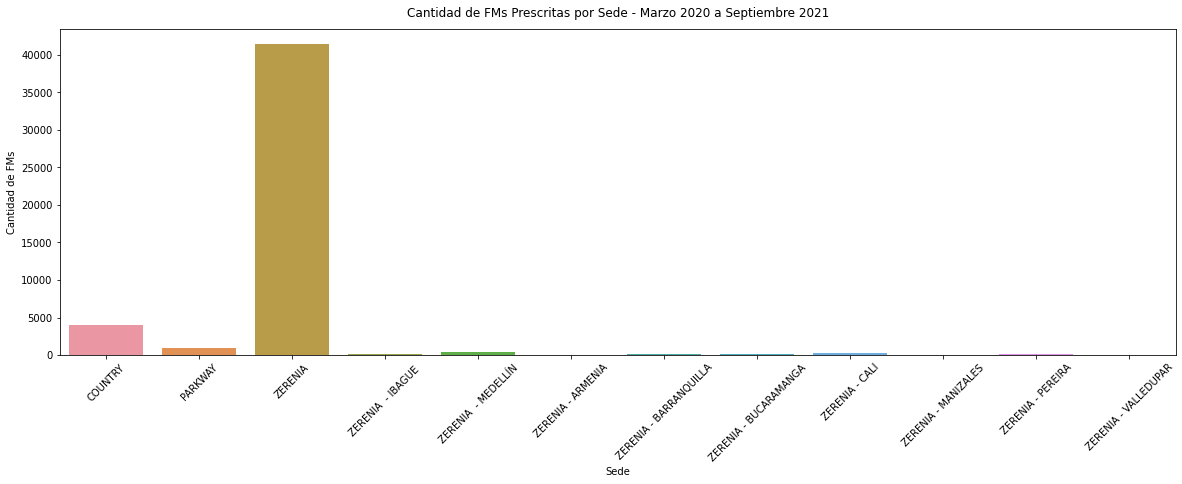

In [ ]:
# barplot of prescribed FMs per Sede

f, ax = plt.subplots(figsize=(20,6))

sns.barplot(x=fm_proced_sede.Sede, y=fm_proced_sede.Cantidad)
# rotate x labels
plt.xticks(rotation=45)
plt.ylabel('Cantidad de FMs')

plt.title('Cantidad de FMs Prescritas por Sede - Marzo 2020 a Septiembre 2021', pad=12)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of FMs Prescribed by Sex

In [ ]:
# FM procedures by sexo
fm_proced_sex = df_procedures.groupby(['Sexo']).Cantidad.sum().reset_index()

fm_proced_sex['%_Prescripciones'] = (fm_proced_sex.Cantidad / fm_proced_sex.Cantidad.sum()) * 100
fm_proced_sex

,Sexo,Cantidad,%_Prescripciones
0,F,33724,71.048751
1,I,1,0.002107
2,M,13741,28.949143


The category 'I' of Sex is not going to be taken into account since Male(M) and Female(F) correspond to 99% of all patients prescribed 

In [ ]:
# make dataframe without Sexo == I
df_procedures = df_procedures[df_procedures['Sexo'] != 'I']

df_procedures.Sexo.unique()

array(['M', 'F'], dtype=object)

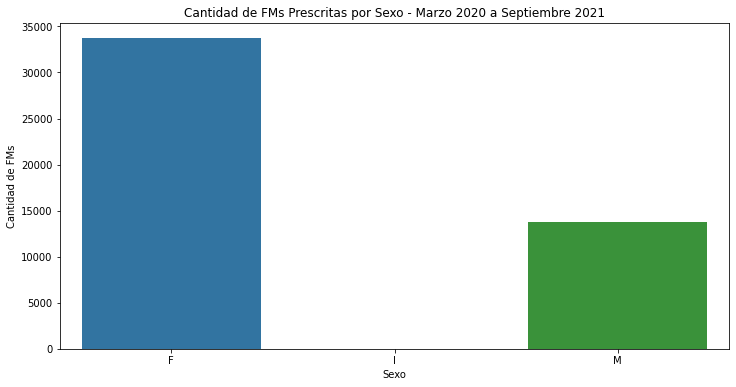

In [ ]:
# barplot of prescribed FMs per Sexo

f, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=fm_proced_sex.Sexo, y=fm_proced_sex.Cantidad)
plt.ylabel('Cantidad de FMs')

plt.title('Cantidad de FMs Prescritas por Sexo - Marzo 2020 a Septiembre 2021')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of FMs Prescribed by Service/Plan

In [ ]:
# FMs prescribed by Plan/Servicio
fm_proced_plan = df_procedures.groupby(['Plan/Servicio']).Cantidad.sum().reset_index()

fm_proced_plan['%'] = (fm_proced_plan.Cantidad / fm_proced_plan.Cantidad.sum()) * 100
fm_proced_plan

,Plan/Servicio,Cantidad,%
0,Cannabis Medicinal,3068,6.463710
1,Consulta Dolor y Cuidados Paliativos,34449,72.577689
2,Dolor y Cuidados Paliativos Bloqueos,14,0.029495
3,Dolor y Cuidados Paliativos Lisis,1,0.002107
4,Fisioterapia,1,0.002107
5,Flete Formula Magistral,8,0.016855
6,Juntas Médicas,119,0.250711
7,Medicina Fisica y Rehabilitacion,6,0.012641
8,Medicina General,1,0.002107
9,Medicina General.,1495,3.149689


 The most relevant Services on the number of FMs prescribed are:
 - is_Dolor_Paliativo >> 72.57% of FMs prescribed
 - is_Psiquiatria >> 11.58% of FMs prescribed
 - is_Cannabis >> 6.46% of FMs prescribed
 - is_Neurology >> 3.57% of FMs prescribed

These Services correspond to 97.1% of FMs prescribed

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of FMs Prescribed by Product Type

In [ ]:
# FMs prescribed by CodProducto
fm_proced_prod = df_procedures.groupby(['CodProducto']).Cantidad.sum().reset_index()

fm_proced_prod['%'] = (fm_proced_prod.Cantidad / fm_proced_prod.Cantidad.sum()) * 100
fm_proced_prod

,CodProducto,Cantidad,%
0,fm001,26989,56.860845
1,fm002,722,1.521121
2,fm003,17784,37.467608
3,fm004,1816,3.825977
4,fm005,154,0.324450


The most relevant product types on the number of FMs prescribed are:
- fm001 >> 56.86% of FMs prescribed
- fm003 >> 37.46% of FMs prescribed

These two product types correspond to 94.3% of FMs prescribed

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of FMs Prescribed by FechaFormulacion

In [ ]:
# convert FechaFormulacion to datetime
df_procedures['FechaFormulacion'] = pd.to_datetime(df_procedures['FechaFormulacion'])

# check that the change was made
df_procedures.dtypes

Ingreso                       int64
DocPaciente                  object
Fecha Nacimiento             object
Edad                          int64
Sexo                         object
CiudadMunicipio              object
Diagnostico                  object
CodigoDiagnostico            object
Plan                         object
Tipo Plan                    object
FechaIngreso                 object
FechaFormulacion     datetime64[ns]
CodProducto                  object
Cantidad                      int64
DocMedico                     int64
NombreMedico                 object
Especialidad                 object
Plan/Servicio                object
Sede                         object
Tipo Examen                  object
dtype: object

In [ ]:
# create month and year column >> using pd.DatetimeIndex()
df_procedures['Month'] = pd.DatetimeIndex(df_procedures['FechaFormulacion']).month
df_procedures['Year'] = pd.DatetimeIndex(df_procedures['FechaFormulacion']).year

df_procedures.head()

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede,Tipo Examen,Month,Year
0,26928,19059029,13/09/1948,73,M,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,NaN,3,2020
1,26806,390646,1/08/1934,87,M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),G530,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,Primera vez,3,2020
2,26846,41595666,20/09/1953,68,F,CAJICÁ,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,NaN,3,2020
3,26861,41499724,20/08/1950,71,F,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,NaN,3,2020
4,26956,52863476,17/09/1981,40,F,BOGOTÁ D.C.,FIBROMIALGIA,M797,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,2,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,Primera vez,3,2020


In [ ]:
# function to calcultate number of presribed FMs
def sum_avg_fm(df):
  calc={}
  calc['Numero_Prescripciones'] = len(df)
  calc['Cantidad_FMs'] = df['Cantidad'].sum()


  return pd.Series(calc, index=['Numero_Prescripciones', 'Cantidad_FMs', ])

In [ ]:
# FMs prescribed by month/year
fm_proced_month = df_procedures.groupby(['Year', 'Month']).apply(sum_avg_fm).reset_index()

fm_proced_month['%_Cantidad'] = (fm_proced_month['Cantidad_FMs'] / fm_proced_month['Cantidad_FMs'].sum()) * 100
fm_proced_month

,Year,Month,Numero_Prescripciones,Cantidad_FMs,%_Cantidad
0,2020,3,8,9,0.018961
1,2020,4,85,88,0.185400
2,2020,5,127,131,0.275993
3,2020,6,357,381,0.802697
4,2020,7,600,614,1.293585
5,2020,8,953,978,2.060466
6,2020,9,1237,1295,2.728326
7,2020,10,1306,1439,3.031708
8,2020,11,1257,1448,3.050669
9,2020,12,1372,1603,3.377225


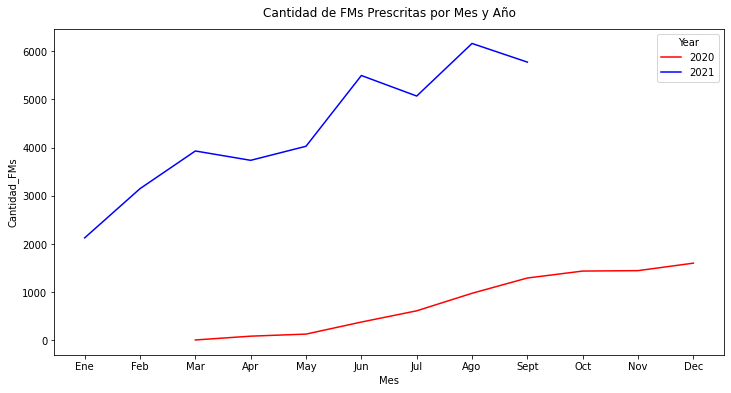

In [ ]:
# lineplot of number of prescriptions by month

f, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x=fm_proced_month['Month'], y=fm_proced_month['Cantidad_FMs'], hue=fm_proced_month['Year'], palette=['red', 'blue'])
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Ago', 'Sept', 'Oct', 'Nov', 'Dec'])

plt.xlabel('Mes')
plt.title('Cantidad de FMs Prescritas por Mes y Año', pad=12)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of Prescribed FMs by Tipo Plan

In [ ]:
# FMs prescribed by Tipo Plan
fm_proced_plan = df_procedures.groupby(['Tipo Plan']).Cantidad.sum().reset_index()

fm_proced_plan['%'] = (fm_proced_plan.Cantidad / fm_proced_plan.Cantidad.sum()) * 100
fm_proced_plan

,Tipo Plan,Cantidad,%
0,ARL,38,0.080059
1,EPS,32007,67.432845
2,Particular,15420,32.487096


The most relevant Tipo Plan on the number of FMs prescribed are:
- EPS >> 67.4% of FMs prescribed
- Particular >> 32.5% of FMs prescribed

These two Plans correspond to 99.9% of FMs prescribed. Plans with plan ARL are going to be removed from the df

In [ ]:
# remove rows with type of plan == 'ARL'
df_procedures = df_procedures[df_procedures['Tipo Plan'] != 'ARL']

df_procedures['Tipo Plan'].unique()

array(['Particular', 'EPS'], dtype=object)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of Prescribed FMs by Diagnostico

In [ ]:
# FMs prescribed by Diagnostico
fm_proced_diag = df_procedures.groupby(['Diagnostico']).Cantidad.sum().reset_index()

# sort values in descending order
fm_proced_diag = fm_proced_diag.sort_values(['Cantidad'], ascending=False)

fm_proced_diag['%'] = (fm_proced_diag.Cantidad / fm_proced_diag.Cantidad.sum()) * 100

# show 10 diagnostics with the most number of FMs prescribed
fm_proced_diag.head(10)

,Diagnostico,Cantidad,%
324,OTRO DOLOR CRONICO,16586,42.003697
118,DOLOR CRONICO INTRATABLE,9107,23.063287
463,TRASTORNO MIXTO DE ANSIEDAD YDEPRESION,2467,6.247626
475,TRASTORNOS DEL INICIO Y DELMANTENIMIENTO DEL S...,1679,4.252032
184,FIBROMIALGIA,1296,3.282093
2,(OSTEO)ARTROSIS PRIMARIAGENERALIZADA,1157,2.930078
141,ENFERMEDAD DE PARKINSON,730,1.848710
437,"TRASTORNO DE ANSIEDAD , NOESPECIFICADO",654,1.656241
241,LUMBAGO NO ESPECIFICADO,369,0.934485
439,TRASTORNO DE ANSIEDADGENERALIZADA,355,0.899030


The most relevant Diagnosticos on the number of FMs prescribed are:  
- Otro Dolor Cronico >> 42.00% of FMs prescribed
- Dolor Cronico Intratable >> 23.06% of FMs prescribed
- Trastorno Mixto de Ansiedad y Depresion >> 6.24% of FMs prescribed
- Insomnio >> 4.25% of FMs prescribed
- Fibromialgia >> 3.28% of FMs prescribed

These Diagnostics correspond to 78.8% of FMs prescribed which is more than the Q3 of the dataset

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Histogram of FMs Prescribed by Edad

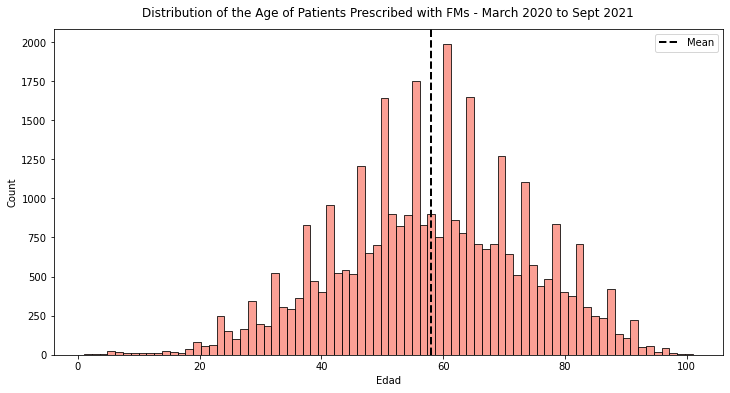

Skewness of Distribution: -0.14669248168485863
Mean of Patients Prescribed: 58.02014282056388
Median of Patients prescribed: 58.0


In [ ]:
# plot histogram

f, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data=df_procedures, x='Edad', color='salmon')
plt.axvline(df_procedures['Edad'].mean(), linestyle='dashed', linewidth=2, color='black', label='Mean')

plt.title('Distribution of the Age of Patients Prescribed with FMs - March 2020 to Sept 2021', pad=12)
plt.legend()
plt.show()

print(f'Skewness of Distribution: {df_procedures.Edad.skew()}')
print(f'Mean of Patients Prescribed: {df_procedures.Edad.mean()}')
print(f'Median of Patients prescribed: {df_procedures.Edad.median()}')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of Prescribed FMs by age_group

In [ ]:
# bin Edad into age groups >> using pd.cut(df, bins=??)
df_procedures['age_group'] = pd.cut(df_procedures['Edad'], bins=4)

# check age_group
df_procedures.head()

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede,Tipo Examen,Month,Year,age_group
0,26928,19059029,13/09/1948,73,M,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,NaN,3,2020,"(51.0, 76.0]"
1,26806,390646,1/08/1934,87,M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),G530,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,Primera vez,3,2020,"(76.0, 101.0]"
2,26846,41595666,20/09/1953,68,F,CAJICÁ,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,NaN,3,2020,"(51.0, 76.0]"
3,26861,41499724,20/08/1950,71,F,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,NaN,3,2020,"(51.0, 76.0]"
4,26956,52863476,17/09/1981,40,F,BOGOTÁ D.C.,FIBROMIALGIA,M797,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,2,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,Primera vez,3,2020,"(26.0, 51.0]"


In [ ]:
# FMs prescribed by age_group
fm_proced_age = df_procedures.groupby(['age_group']).Cantidad.sum().reset_index()

fm_proced_age['%'] = (fm_proced_age.Cantidad / fm_proced_age.Cantidad.sum()) * 100
fm_proced_age

,age_group,Cantidad,%
0,"(0.9, 26.0]",1316,2.774791
1,"(26.0, 51.0]",15535,32.755603
2,"(51.0, 76.0]",24893,52.486980
3,"(76.0, 101.0]",5683,11.982626


The most relevant Age Groups on the number of FMs prescribed are:   

- 51 to 76 years >> 52.5% of FMs prescribed
- 26 to 51 years >> 32.7% of FMs prescribed
- 76 to 101 years >> 11.9% of 

These three age groups correspond to 85.2% of FMs prescribed

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of Prescribed FMs by Ciudad

In [ ]:
# FMs prescribed by city/location
fm_proced_city = df_procedures.groupby(['CiudadMunicipio']).Cantidad.sum().reset_index()
# sort values in descending order
fm_proced_city = fm_proced_city.sort_values('Cantidad', ascending=False)

fm_proced_city['%'] = (fm_proced_city.Cantidad / fm_proced_city.Cantidad.sum()) * 100
fm_proced_city.head(10)

,CiudadMunicipio,Cantidad,%
49,BOGOTÁ D.C.,32860,69.285428
401,SOACHA,2122,4.474245
243,MEDELLÍN,983,2.072659
234,MADRID,889,1.874460
260,MOSQUERA,588,1.239800
389,SANTIAGO DE CALI,573,1.208173
161,FUNZA,573,1.208173
148,FACATATIVÁ,549,1.157568
472,ZIPAQUIRÁ,548,1.155460
96,CHÍA,382,0.805448


The most relevant Cities on the number of FMs prescribed are:    
- Bogota >> 69.28% of FMs prescribed
- Soacha >> 4.47% of FMs prescribed
- Medellin >> 2.07% of FMs prescribed
- Madrid >> 1.87% of FMs prescribed
- Mosquera >> 1.23% of FMs prescribed

These cities correspond to 78.9% of the locations where FMs are prescribed, more than the Q3 of all the data

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Sales FMs

In [ ]:
# check df
df_sales.head()

,ingreso,cedula,fecha_oc
0,26806,390646,2020-03-19
1,26793,13352962,2020-03-19
2,26928,19059029,2020-03-19
3,26891,31259698,2020-03-19
4,26720,41453437,2020-03-19


In [ ]:
# rename ingreso to Ingreso
df_sales.rename(columns={'ingreso': 'Ingreso'}, inplace=True)

df_sales.head()

,Ingreso,cedula,fecha_oc
0,26806,390646,2020-03-19
1,26793,13352962,2020-03-19
2,26928,19059029,2020-03-19
3,26891,31259698,2020-03-19
4,26720,41453437,2020-03-19


In [ ]:
# check shape
df_sales.shape

(28003, 3)

In [ ]:
# check column types
df_sales.dtypes

Ingreso      int64
cedula      object
fecha_oc    object
dtype: object

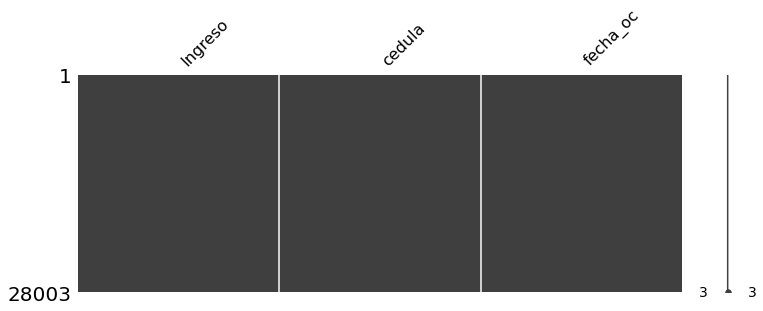

In [ ]:
# check for missing values
msg.matrix(df_sales, figsize=(12,4))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Number of Prescriptions Sold by Year/Month 

In [ ]:
# change fecha_oc type to datetime
df_sales['fecha_oc'] = pd.to_datetime(df_sales['fecha_oc'])

In [ ]:
# check changes
df_sales.dtypes

Ingreso              int64
cedula              object
fecha_oc    datetime64[ns]
dtype: object

In [ ]:
# create a month and year column
df_sales['month_sold'] = pd.DatetimeIndex(df_sales['fecha_oc']).month
df_sales['year_sold'] = pd.DatetimeIndex(df_sales['fecha_oc']).year 

df_sales.head()

,Ingreso,cedula,fecha_oc,month_sold,year_sold
0,26806,390646,2020-03-19,3,2020
1,26793,13352962,2020-03-19,3,2020
2,26928,19059029,2020-03-19,3,2020
3,26891,31259698,2020-03-19,3,2020
4,26720,41453437,2020-03-19,3,2020


In [ ]:
# function to calculate number of prescriptions sold
def num_sold(df):
  calc = {}
  calc['prescriptions_sold'] = len(df)

  return pd.Series(calc, index=['prescriptions_sold'])

In [ ]:
# prescriptions sold by year /month
presc_sold_month = df_sales.groupby(['year_sold', 'month_sold']).apply(num_sold).reset_index()

presc_sold_month['%'] = (presc_sold_month.prescriptions_sold / presc_sold_month.prescriptions_sold.sum()) * 100
presc_sold_month

,year_sold,month_sold,prescriptions_sold,%
0,2020,3,7,0.024997
1,2020,4,50,0.178552
2,2020,5,118,0.421383
3,2020,6,195,0.696354
4,2020,7,321,1.146306
5,2020,8,558,1.992644
6,2020,9,885,3.160376
7,2020,10,876,3.128236
8,2020,11,873,3.117523
9,2020,12,1096,3.913866


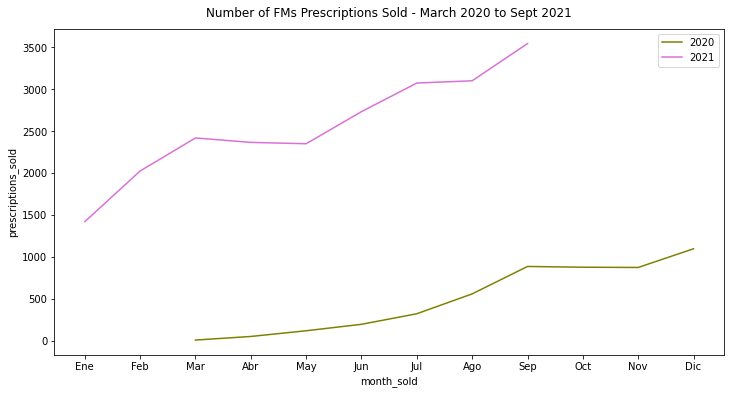

In [ ]:
# lineplot of prescriptions sold by year / month

f, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x=presc_sold_month.month_sold, y=presc_sold_month.prescriptions_sold,\
             hue=presc_sold_month.year_sold, palette=['olive', 'orchid'])

ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

plt.title('Number of FMs Prescriptions Sold - March 2020 to Sept 2021', pad=12)
plt.legend()
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## DFs Merging

In [ ]:
 # check size of df_procedures
 df_procedures.shape

(35149, 23)

In [ ]:
# left join of df_procedures and df_sales on ingreso
df_merged = df_procedures.merge(df_sales, on='Ingreso', how='left')

df_merged.tail()

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede,Tipo Examen,Month,Year,age_group,cedula,fecha_oc,month_sold,year_sold
35144,225558,53063429,15/05/1984,37,F,MADRID,NaN,NaN,FAMISANAR EPS - SUBSIDIADO,EPS,2021-09-29,2021-09-29,fm001,4,55303292,MARIA ANGELICA SOLANO MANZANO,Medicina General,Consulta Dolor y Cuidados Paliativos,ZERENIA,Control,9,2021,"(26.0, 51.0]",NaN,NaT,NaN,NaN
35145,225559,1070304763,19/06/1988,33,F,ZIPAQUIRÁ,NaN,NaN,FAMISANAR EPS - CONTRIBUTIVO,EPS,2021-09-29,2021-09-29,fm001,1,55303292,MARIA ANGELICA SOLANO MANZANO,Medicina General,Consulta Dolor y Cuidados Paliativos,ZERENIA,Control,9,2021,"(26.0, 51.0]",NaN,NaT,NaN,NaN
35146,225564,27059635,4/09/1929,92,F,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2021-09-29,2021-09-29,fm003,1,91222978,LUIS FERNANDO CHAIN HENAO,Medicina General,Medicina General.,ZERENIA,NaN,9,2021,"(76.0, 101.0]",27059635,2021-09-30,9.0,2021.0
35147,225566,52903966,1/07/1982,39,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,R522,FAMISANAR EPS - CONTRIBUTIVO,EPS,2021-09-29,2021-09-29,fm003,1,19062502,JORGE PATIÑO,Dolor Y Cuidado Paliativo,Consulta Dolor y Cuidados Paliativos,ZERENIA,Control,9,2021,"(26.0, 51.0]",NaN,NaT,NaN,NaN
35148,225591,83673,16/12/1930,91,M,BOGOTÁ D.C.,CEFALEA,R51X,SURA EPS - CONTRIBUTIVO,EPS,2021-09-29,2021-09-29,fm001,1,14202045,GONZALO MELO GOMEZ,Neurologia,Neurologia,PARKWAY,Primera vez,9,2021,"(76.0, 101.0]",NaN,NaT,NaN,NaN


In [ ]:
# check merge df size
df_merged.shape

(35149, 27)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Selection Features & label in DF

In [ ]:
# create column not_buyer >> if the column 'cedula' isna() >> True
df_merged['not_buyer'] = df_merged.cedula.isna()

# create column 'FM_buyer >> 1 if its not_buyer == False 
df_merged['FM_buyer'] = [1 if df_merged.iloc[index].not_buyer == False else 0 for index in df_merged.index]

In [ ]:
df_merged.tail(3)

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede,Tipo Examen,Month,Year,age_group,cedula,fecha_oc,month_sold,year_sold,not_buyer,FM_buyer
35146,225564,27059635,4/09/1929,92,F,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2021-09-29,2021-09-29,fm003,1,91222978,LUIS FERNANDO CHAIN HENAO,Medicina General,Medicina General.,ZERENIA,NaN,9,2021,"(76.0, 101.0]",27059635,2021-09-30,9.0,2021.0,False,1
35147,225566,52903966,1/07/1982,39,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,R522,FAMISANAR EPS - CONTRIBUTIVO,EPS,2021-09-29,2021-09-29,fm003,1,19062502,JORGE PATIÑO,Dolor Y Cuidado Paliativo,Consulta Dolor y Cuidados Paliativos,ZERENIA,Control,9,2021,"(26.0, 51.0]",NaN,NaT,NaN,NaN,True,0
35148,225591,83673,16/12/1930,91,M,BOGOTÁ D.C.,CEFALEA,R51X,SURA EPS - CONTRIBUTIVO,EPS,2021-09-29,2021-09-29,fm001,1,14202045,GONZALO MELO GOMEZ,Neurologia,Neurologia,PARKWAY,Primera vez,9,2021,"(76.0, 101.0]",NaN,NaT,NaN,NaN,True,0


In [ ]:
# selection of relevant features & label on new df
df_proced_sales = df_merged[['Ingreso', 'DocPaciente', 'age_group', 'Sexo', 'CiudadMunicipio', 'Diagnostico',\
                             'Tipo Plan', 'FechaFormulacion', 'CodProducto', 'Cantidad', 'Plan/Servicio', 'Sede',\
                             'Month', 'Year', 'month_sold', 'year_sold', 'FM_buyer', 'Tipo Examen']]

df_proced_sales.head()

,Ingreso,DocPaciente,age_group,Sexo,CiudadMunicipio,Diagnostico,Tipo Plan,FechaFormulacion,CodProducto,Cantidad,Plan/Servicio,Sede,Month,Year,month_sold,year_sold,FM_buyer,Tipo Examen
0,26928,19059029,"(51.0, 76.0]",M,BOGOTÁ D.C.,NaN,Particular,2020-03-19,fm001,1,Neurologia,ZERENIA,3,2020,3.0,2020.0,1,NaN
1,26806,390646,"(76.0, 101.0]",M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),Particular,2020-03-19,fm001,1,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020,3.0,2020.0,1,Primera vez
2,26846,41595666,"(51.0, 76.0]",F,CAJICÁ,NaN,Particular,2020-03-19,fm001,1,Neurologia,ZERENIA,3,2020,3.0,2020.0,1,NaN
3,26861,41499724,"(51.0, 76.0]",F,BOGOTÁ D.C.,NaN,Particular,2020-03-19,fm001,1,Neurologia,ZERENIA,3,2020,3.0,2020.0,1,NaN
4,26956,52863476,"(26.0, 51.0]",F,BOGOTÁ D.C.,FIBROMIALGIA,Particular,2020-03-19,fm001,2,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020,NaN,NaN,0,Primera vez


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Features Comparison Between Buyers & Not Buyers

#### FMs Bought Vs FMs Prescribed

In [ ]:
# groupby 'FM_buyer'
fm_buyers = df_proced_sales.groupby(['FM_buyer']).Cantidad.sum().reset_index()

fm_buyers

,FM_buyer,Cantidad
0,0,9227
1,1,38200


In [ ]:
# Total # of FMs prescribed
print(f'Total # of FMs prescribed from March 2020 to September 2021: {df_proced_sales.Cantidad.sum()}')

# Total # of FMs bought
print(f'Total # of FMs bought from March 2020 to September 2021: {38200}')

# Rate of Purchase
print(f'Rate of Purchase of FMs prescribed: {(round((38200/47427)*100, 2))}%')

Total # of FMs prescribed from March 2020 to September 2021: 47427
Total # of FMs bought from March 2020 to September 2021: 38200
Rate of Purchase of FMs prescribed: 80.54%


The Rate of Purchase of FMs prescribed from March 2020 to September 2021 is **80.54%**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### FMs Bought by Sex

In [ ]:
# groupby FM_buyer and sexo
fm_sex = df_proced_sales.groupby(['FM_buyer', 'Sexo']).Cantidad.sum().reset_index()

fm_sex

,FM_buyer,Sexo,Cantidad
0,0,F,6494
1,0,M,2733
2,1,F,27220
3,1,M,10980


In [ ]:
# pivot table >> columns, index=rows, values
fm_sex = fm_sex.pivot(
    columns='FM_buyer',
    index='Sexo',
    values='Cantidad').reset_index()

# change column names
fm_sex.columns = ['sex', 'FMs_non_bought', 'FMs_bought']

fm_sex

,sex,FMs_non_bought,FMs_bought
0,F,6494,27220
1,M,2733,10980


In [ ]:
# total number of prescriptions
fm_sex['FMs_prescribed'] = fm_sex.FMs_bought + fm_sex.FMs_non_bought

# % of quantity of FMs prescribed bought
fm_sex['%_purchase'] = (fm_sex.FMs_bought / fm_sex.FMs_prescribed) * 100

# sort values
fm_sex = fm_sex.sort_values('%_purchase', ascending=False)
fm_sex

,sex,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
0,F,6494,27220,33714,80.737972
1,M,2733,10980,13713,80.070007


Even though females have bought 16,240 FMs more than males during the period 
of March 2020 to September 2021, their purchase rate by gender is both in 80%

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### FMs Bougth by Age Group

In [ ]:
# groupby FM_buyer and age_group
fm_age = df_proced_sales.groupby(['FM_buyer', 'age_group']).Cantidad.sum().reset_index()

fm_age

,FM_buyer,age_group,Cantidad
0,0,"(0.9, 26.0]",342
1,0,"(26.0, 51.0]",3734
2,0,"(51.0, 76.0]",4341
3,0,"(76.0, 101.0]",810
4,1,"(0.9, 26.0]",974
5,1,"(26.0, 51.0]",11801
6,1,"(51.0, 76.0]",20552
7,1,"(76.0, 101.0]",4873


In [ ]:
# pivot table 
fm_age = fm_age.pivot(
    columns='FM_buyer',
    index='age_group',
    values='Cantidad').reset_index()

# set column names
fm_age.columns = ['age_group', 'FMs_non_bought', 'FMs_bought']

fm_age

,age_group,FMs_non_bought,FMs_bought
0,"(0.9, 26.0]",342,974
1,"(26.0, 51.0]",3734,11801
2,"(51.0, 76.0]",4341,20552
3,"(76.0, 101.0]",810,4873


In [ ]:
# create column FMs_prescribed
fm_age['FMs_prescribed'] = fm_age.FMs_non_bought + fm_age.FMs_bought

# create column %_purchase
fm_age['%_purchase'] = (fm_age.FMs_bought / fm_age.FMs_prescribed) * 100

# sort values
fm_age = fm_age.sort_values('%_purchase', ascending=False)
fm_age

,age_group,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
3,"(76.0, 101.0]",810,4873,5683,85.746965
2,"(51.0, 76.0]",4341,20552,24893,82.561363
1,"(26.0, 51.0]",3734,11801,15535,75.963952
0,"(0.9, 26.0]",342,974,1316,74.012158


Even though the age group between 76 to 101 years have just 5683 FMs prescribed between March 2020 and September 2021 they have the highest rate of purchase with 85.7%.

They are followed by the age group of 51 to 76 years with a rate of purchase of 82.5% and the age group of 26 to 51 years old with 75.9% of FMs bought

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### FMs Bought by Plan Type

In [ ]:
# groupby FM_buyer and Tipo Plan
fm_plan = df_proced_sales.groupby(['FM_buyer', 'Tipo Plan']).Cantidad.sum().reset_index()
fm_plan

,FM_buyer,Tipo Plan,Cantidad
0,0,EPS,6884
1,0,Particular,2343
2,1,EPS,25123
3,1,Particular,13077


In [ ]:
# pivot table >> columns are FMs_non_bought & FMs_bought
fm_plan = fm_plan.pivot(
    columns='FM_buyer',
    index='Tipo Plan',
    values='Cantidad').reset_index()

# set columns
fm_plan.columns = ['Plan_type', 'FMs_non_bought', 'FMs_bought']

fm_plan

,Plan_type,FMs_non_bought,FMs_bought
0,EPS,6884,25123
1,Particular,2343,13077


In [ ]:
# create column FMs_prescribed
fm_plan['FMs_prescribed'] = fm_plan.FMs_non_bought + fm_plan.FMs_bought

# create column %_purchase
fm_plan['%_purchase'] = (fm_plan.FMs_bought / fm_plan.FMs_prescribed) * 100

# sort values
fm_plan = fm_plan.sort_values('%_purchase', ascending=False)
fm_plan

,Plan_type,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
1,Particular,2343,13077,15420,84.805447
0,EPS,6884,25123,32007,78.492205


Even though the number of FMs prescribed and bought by *EPS* exceed in more than 90% the number of FMs prescribed and bought by *Particular*, the rate of purchase of the latter (84.8%) is 6.4% greater than the former (78.4%).

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### FMs Bought by Exam Type

In [ ]:
# groupby FM_buyer, Tipo Examen
fm_exam = df_proced_sales.groupby(['FM_buyer', 'Tipo Examen']).Cantidad.sum().reset_index()

fm_exam.head()

,FM_buyer,Tipo Examen,Cantidad
0,0,Control,6625
1,0,Junta Médica,41
2,0,Primera vez,2475
3,0,Procedimientos,14
4,1,Control,29757


In [ ]:
# pivot table 
fm_exam = fm_exam.pivot(
    columns='FM_buyer',
    index='Tipo Examen',
    values='Cantidad').reset_index()

# rename columns
fm_exam.columns = ['exam_type', 'FMs_non_bought', 'FMs_bought']

fm_exam

,exam_type,FMs_non_bought,FMs_bought
0,Control,6625.0,29757.0
1,Junta Médica,41.0,92.0
2,Primera vez,2475.0,6082.0
3,Procedimientos,14.0,13.0
4,Valoración,NaN,7.0


In [ ]:
# create column FMs_prescribed
fm_exam['FMs_prescribed'] = fm_exam.FMs_bought + fm_exam.FMs_non_bought

# create column %_purchase
fm_exam['%_purchase'] = (fm_exam.FMs_bought / fm_exam.FMs_prescribed) * 100

# sort 
fm_exam = fm_exam.sort_values('%_purchase', ascending=False)

fm_exam

,exam_type,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
0,Control,6625.0,29757.0,36382.0,81.790446
2,Primera vez,2475.0,6082.0,8557.0,71.076312
1,Junta Médica,41.0,92.0,133.0,69.172932
3,Procedimientos,14.0,13.0,27.0,48.148148
4,Valoración,NaN,7.0,NaN,NaN


Although FMs bought in *Contol* exceed in 23,675 bottles the ones from *Primera vez* the purchase rate of the former is just 10.7% greater than the latter.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### FMs Bought by Site

In [ ]:
# groupby 'FM_buyer' and Sede
fm_site = df_proced_sales.groupby(['FM_buyer', 'Sede']).Cantidad.sum().reset_index()

fm_site.head()

,FM_buyer,Sede,Cantidad
0,0,COUNTRY,603
1,0,PARKWAY,281
2,0,ZERENIA,8107
3,0,ZERENIA - IBAGUE,19
4,0,ZERENIA - MEDELLÍN,52


In [ ]:
# pivot table
fm_site = fm_site.pivot(
    columns='FM_buyer',
    index='Sede',
    values='Cantidad').reset_index()
  
# change column names
fm_site.columns = ['Site', 'FMs_non_bought', 'FMs_bought']

fm_site

,Site,FMs_non_bought,FMs_bought
0,COUNTRY,603,3349
1,PARKWAY,281,638
2,ZERENIA,8107,33219
3,ZERENIA - IBAGUE,19,87
4,ZERENIA - MEDELLÍN,52,368
5,ZERENIA - ARMENIA,20,41
6,ZERENIA - BARRANQUILLA,20,69
7,ZERENIA - BUCARAMANGA,50,127
8,ZERENIA - CALI,37,219
9,ZERENIA - MANIZALES,2,1


In [ ]:
# create column FMs_prescribed
fm_site['FMs_prescribed'] = fm_site.FMs_bought + fm_site.FMs_non_bought

# create column %_purchase
fm_site['%_purchase'] = (fm_site.FMs_bought / fm_site.FMs_prescribed) * 100

# sort values
fm_site = fm_site.sort_values('%_purchase', ascending=False)

fm_site

,Site,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
4,ZERENIA - MEDELLÍN,52,368,420,87.619048
8,ZERENIA - CALI,37,219,256,85.546875
0,COUNTRY,603,3349,3952,84.741903
3,ZERENIA - IBAGUE,19,87,106,82.075472
2,ZERENIA,8107,33219,41326,80.382810
6,ZERENIA - BARRANQUILLA,20,69,89,77.528090
7,ZERENIA - BUCARAMANGA,50,127,177,71.751412
10,ZERENIA - PEREIRA,34,80,114,70.175439
1,PARKWAY,281,638,919,69.423286
5,ZERENIA - ARMENIA,20,41,61,67.213115


Even though Zerenia exceeds the other sites in more than 30,000 FMs bought its purchase rate (80.38%) is lower than Medellín (87.6%), Cali (85.5%), Country (84.7%, second in number of FMs bought) and Ibague (82.07%)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### FMs Bought by City

In [ ]:
# groupby FM_buyer and CiudadMunicipio
fm_city = df_proced_sales.groupby(['FM_buyer', 'CiudadMunicipio']).Cantidad.sum().reset_index()

fm_city.head()

,FM_buyer,CiudadMunicipio,Cantidad
0,0,ACACÍAS,1
1,0,ACAPULCO,1
2,0,AGUA DE DIOS,2
3,0,AGUACHICA,1
4,0,AGUAS FRÍAS - MEDELLÍN,1


In [ ]:
# pivot table
fm_city = fm_city.pivot(
    columns='FM_buyer',
    index='CiudadMunicipio',
    values='Cantidad').reset_index()

# set column names
fm_city.columns = ['City', 'FMs_non_bought', 'FMs_bought']

In [ ]:
# create FMs_prescribed
fm_city['FMs_prescribed'] = fm_city.FMs_bought + fm_city.FMs_non_bought

# create %_purchase
fm_city['%_purchase'] = (fm_city.FMs_bought / fm_city.FMs_prescribed) * 100

# sort values
fm_city = fm_city.sort_values(by='FMs_prescribed', ascending=False)

fm_city.head()

,City,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
49,BOGOTÁ D.C.,6049.0,26811.0,32860.0,81.591601
401,SOACHA,467.0,1655.0,2122.0,77.992460
243,MEDELLÍN,168.0,815.0,983.0,82.909461
234,MADRID,200.0,689.0,889.0,77.502812
260,MOSQUERA,98.0,490.0,588.0,83.333333


Of the 5 cities/towns with the highest number of FMs prescribed Mosquera has the highest purchase rate with 83.3%, followed by Medellin and Bogotá with 82.9% and 81.5% respectively. 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### FMs Bought by Diagnostic

In [ ]:
# groupby 'FM_buyer' and 'Diagnostico'
fm_diagnostic = df_proced_sales.groupby(['FM_buyer', 'Diagnostico']).Cantidad.sum().reset_index()

fm_diagnostic.head()

,FM_buyer,Diagnostico,Cantidad
0,0,(OSTEO)ARTROSIS EROSIVA,3
1,0,(OSTEO)ARTROSIS PRIMARIAGENERALIZADA,164
2,0,"ALCOHOLISMO, NIVEL DE INTOXICACIONNO ESPECIFICADO",2
3,0,AMPUTACION DE MIEMBRO(S),2
4,0,"AMPUTACION TRAUMATICA DE LAPIERNA, NIVEL NO ES...",1


In [ ]:
# pivot table
fm_diagnostic = fm_diagnostic.pivot(
    columns='FM_buyer',
    index='Diagnostico',
    values='Cantidad').reset_index()

# set column names
fm_diagnostic.columns = ['Diagnostic', 'FMs_non_bought', 'FMs_bought']

In [ ]:
# create 'FMs_prescribed'
fm_diagnostic['FMs_precribed'] = fm_diagnostic.FMs_bought + fm_diagnostic.FMs_non_bought

# craete '%_purchase'
fm_diagnostic['%_purchase'] = (fm_diagnostic.FMs_bought / fm_diagnostic.FMs_precribed) * 100

# sort values
fm_diagnostic = fm_diagnostic.sort_values(by='FMs_precribed', ascending=False)

fm_diagnostic.head()

,Diagnostic,FMs_non_bought,FMs_bought,FMs_precribed,%_purchase
324,OTRO DOLOR CRONICO,2759.0,13827.0,16586.0,83.365489
118,DOLOR CRONICO INTRATABLE,1744.0,7363.0,9107.0,80.849896
463,TRASTORNO MIXTO DE ANSIEDAD YDEPRESION,449.0,2018.0,2467.0,81.799757
475,TRASTORNOS DEL INICIO Y DELMANTENIMIENTO DEL S...,308.0,1371.0,1679.0,81.655747
184,FIBROMIALGIA,256.0,1040.0,1296.0,80.246914


Of the 5 Diagnostics with the most FMs precribed the one with the highest purchase rate is 'OTRO DOLOR CRONICO' with 83.3% followed by 'TRASTORNO MIXTO DE ANSIEDAD Y DEPRESION' and 'DOLOR CRONICO INTRATABLE' with 81.7% and 80.8%

#### FMs Bought by Product

In [ ]:
# groupby FM_buyer and CodProducto
fm_product = df_proced_sales.groupby(['FM_buyer', 'CodProducto']).Cantidad.sum().reset_index()

fm_product

,FM_buyer,CodProducto,Cantidad
0,0,fm001,5429
1,0,fm002,113
2,0,fm003,3331
3,0,fm004,334
4,0,fm005,20
5,1,fm001,21531
6,1,fm002,608
7,1,fm003,14445
8,1,fm004,1482
9,1,fm005,134


In [ ]:
# pivot table
fm_product = fm_product.pivot(
    columns='FM_buyer',
    index='CodProducto',
    values='Cantidad').reset_index()

# set column names
fm_product.columns = ['Product', 'FMs_non_bought', 'FMs_bought']
fm_product

,Product,FMs_non_bought,FMs_bought
0,fm001,5429,21531
1,fm002,113,608
2,fm003,3331,14445
3,fm004,334,1482
4,fm005,20,134


In [ ]:
# create column 'FMs_prescribed'
fm_product['FMs_prescribed'] = fm_product.FMs_bought + fm_product.FMs_non_bought

# create column '%_purchase'
fm_product['%_purchase'] = (fm_product.FMs_bought / fm_product.FMs_prescribed) * 100

# sort values
fm_product.sort_values('%_purchase', ascending=False)

fm_product

,Product,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
0,fm001,5429,21531,26960,79.862760
1,fm002,113,608,721,84.327323
2,fm003,3331,14445,17776,81.261251
3,fm004,334,1482,1816,81.607930
4,fm005,20,134,154,87.012987


Even though fm001 is the type of product which has the highest number of FMs prescribed it has the lowest rate of purchase of the 5 products with 79.8%. Interestingly enough, fm005 and fm002 the two products which have the highest concentration of THC also have the highest rate of purchase with 87% and 84.32% respectively. 

Below you will find a chi-square test to see if the different type of products have statistically significant differences in the purchase rate

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Statistical Significance - Product Type & Purchase Rate

- A Chi-Square test will be run to see if the different type of products have statiscally significant differences in the purchase rate

||FMs_bought|FMs_non_bought|
|-|-|-|
|fm001|?|?|
|fm002|?|?|



In [ ]:
# import chi-square package
from scipy.stats import chi2_contingency

In [ ]:
# fm_product
fm_product

,Product,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
0,fm001,5429,21531,26960,79.862760
1,fm002,113,608,721,84.327323
2,fm003,3331,14445,17776,81.261251
3,fm004,334,1482,1816,81.607930
4,fm005,20,134,154,87.012987


In [ ]:
# contingency table fm001 & fm002
contingency_prod = [[21531, 5429],
                    [608, 113]]

# Hypothesis
print('Ho >> No association between fm001 and fm002 purchase rates')
print('H1 >> There is an association between fm001 and fm002 purchase rates', '\n')

chi2, pval, dof, expected = chi2_contingency(contingency_prod)

print('Expected values if there was NO Association:')
print(expected, '\n')

print(f'P-Value: {pval}')
print('Significant Threshold: 0.05', '\n')

print('We can conclude with a 95% confidence that there IS an association between fm001 and fm002 purchase rates')
print('fm002 are shown to have a statiscally significant higher purchase rate than fm001')
print('This can be because FMs with THC allows to aliviate pain on the patients with higher degree pathologies')

Ho >> No association between fm001 and fm002 purchase rates
H1 >> There is an association between fm001 and fm002 purchase rates 

Expected values if there was NO Association:
[[21562.35107113  5397.64892887]
 [  576.64892887   144.35107113]] 

P-Value: 0.003621260199950411
Significant Threshold: 0.05 

We can conclude with a 95% confidence that there IS an association between fm001 and fm002 purchase rates
fm002 are shown to have a statiscally significant higher purchase rate than fm001
This can be because FMs with THC allows to aliviate pain on the patients with higher degree pathologies


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Statistical Significance - Age Group & Purchase Rate

- A Chi-Square test will be run to see if the age groups have statiscally significant differences in the purchase rate

||FMs_bought|FMs_non_bought|
|-|-|-|
|76-101|?|?|
|26-51|?|?|

In [ ]:
fm_age

,age_group,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
3,"(76.0, 101.0]",810,4873,5683,85.746965
2,"(51.0, 76.0]",4341,20552,24893,82.561363
1,"(26.0, 51.0]",3734,11801,15535,75.963952
0,"(0.9, 26.0]",342,974,1316,74.012158


In [ ]:
# contingency table
contingency_age = [[4873, 810],
                   [11801, 3734]]

# Hypothesis
print('Ho >> No association between the age groups [76-101] and [26-51] purchase rates')
print('H1 >> There is an association between the age groups [76-101] and [26-51] purchase rates', '\n')

chi2, pval, dof, expected = chi2_contingency(contingency_age)

print('Expected values if there is NO Association:')
print(expected, '\n')

print(f'P-Value: {pval}')
print('Significant Threshold: 0.05', '\n')

print('We can conclude with a 95% confidence that there IS an association between the age groups [76-101] and [26-51] purchase rates')
print('Even though the age group [76-101] have been the least prescribed of the two, they are shown to have a statiscally \nhigher purchase rate than the age group of [26-51], which is the age group with the highest number of FMs prescribed')

Ho >> No association between the age groups [76-101] and [26-51] purchase rates
H1 >> There is an association between the age groups [76-101] and [26-51] purchase rates 

Expected values if there is NO Association:
[[ 4465.94127627  1217.05872373]
 [12208.05872373  3326.94127627]] 

P-Value: 2.8663598589917413e-53
Significant Threshold: 0.05 

We can conclude with a 95% confidence that there IS an association between the age groups [76-101] and [26-51] purchase rates
Even though the age group [76-101] have been the least prescribed of the two, they are shown to have a statiscally 
higher purchase rate than the age group of [26-51], which is the age group with the highest number of FMs prescribed


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Statistical Significance - Exam Type & Purchase Rate
- A Chi-Square test will be run to see if the exam types *Control* and *Primera vez* have statistically significant differences in the purchase rate 

||FMs_bought|FMs_non_bought|
|-|-|-|
|Control|?|?|
|Primera vez|?|?|

In [ ]:
fm_exam

,exam_type,FMs_non_bought,FMs_bought,FMs_prescribed,%_purchase
0,Control,6625.0,29757.0,36382.0,81.790446
2,Primera vez,2475.0,6082.0,8557.0,71.076312
1,Junta Médica,41.0,92.0,133.0,69.172932
3,Procedimientos,14.0,13.0,27.0,48.148148
4,Valoración,NaN,7.0,NaN,NaN


In [ ]:
# contingency table
contingency_exam = [[29757, 6625],
                    [6082, 2475]]

# Hypothesis
print('Ho >> No association between the exam types "Control" and "Primera vez" purchase rates')
print('H1 >> There is an association the exam types "Control" and "Primera vez" purchase rates', '\n')

chi2, pval, dof, expected = chi2_contingency(contingency_exam)

print('Expected values if there is NO Association:')
print(expected, '\n')

print(f'P-Value: {pval}')
print('Significant Threshold: 0.05', '\n')

print('We can conclude with a 95% confidence that there IS an association between the exam types "Contol" and "Primera vez" purchase rates')
print('Even though exams of "Primera vez" have been the least prescribed of the two, its purchase rate is just 10% lower at 71.07%')
print('than "Control" at 81.7%')

Ho >> No association between the exam types "Control" and "Primera vez" purchase rates
H1 >> There is an association the exam types "Control" and "Primera vez" purchase rates 

Expected values if there is NO Association:
[[29014.76441398  7367.23558602]
 [ 6824.23558602  1732.76441398]] 

P-Value: 5.867143595843355e-109
Significant Threshold: 0.05 

We can conclude with a 95% confidence that there IS an association between the exam types "Contol" and "Primera vez" purchase rates
Even though exams of "Primera vez" have been the least prescribed of the two, its purchase rate is just 10% lower at 71.07%
than "Control" at 81.7%


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Feature Encoding

#### Sex Encoding 
- F >> female will be mapped to 0 >> 80.7% purchase rate
- M >> male will be mapped to 1 >> 80 % purchase rate



#### Age Encoding
- is_51_76 >> 1 if True >> 82.5% purchase rate
- is_76_101 >> 1 if True >> 85.74% purchase rate

#### Plan Type Encoding is_plan_particular
- EPS >> will be mapped to 0 >> 78.48% purchase rate
- Particular >> will be mapped to 1 >> 84.8% purchase rate

#### Product Type Encoding 
- is_fm002 (THC) >> 1 >> 84.3% purchase rate
- is_fm001 (CBD) >> 1 >> 79.8% purchase rate

#### City/Town Encoding
- is_Mosquera >> 1 >> 83.6% purchase rate 
- is_Medellin >> 1 >> 82.9% purchase rate
- is_Bogota >> 1 >> 81.5% purchase rate

#### Diagnostic Encoding
- other cronic_pain >> 1 >> 83.3% purchase rate
- is_anxiety_depression >> 1 >> 81.7% purchase rate
- is_cronic_pain_uncu >> 1 >> 80.8% purchase rate

### Exam Type Encoding
- is_control >> 1 >> 81.7% purchase rate




In [ ]:
# create sex column
df_proced_sales['Sex'] = [0 if df_proced_sales.loc[index, 'Sexo'] == 'F' else 1 for index in df_proced_sales.index]

# create is_51_76
df_proced_sales['is_51_76'] = [1 if df_proced_sales.loc[index, 'age_group'] == pd.Interval(51.0, 76.0) else 0\
                              for index in df_proced_sales.index]

# create is_76_101
df_proced_sales['is_76_101'] = [1 if df_proced_sales.loc[index, 'age_group'] == pd.Interval(76.0, 101.0) else 0\
                                for index in df_proced_sales.index]

# create is_plan_particular
df_proced_sales['is_plan_particular'] = [1 if df_proced_sales.loc[index, 'Tipo Plan'] == 'Particular' else 0\
                                         for index in df_proced_sales.index]

# create is_fm002
df_proced_sales['is_fm002'] = [1 if df_proced_sales.loc[index, 'CodProducto'] == 'fm002' else 0\
                               for index in df_proced_sales.index]

# create is_fm001
df_proced_sales['is_fm001'] = [1 if df_proced_sales.loc[index, 'CodProducto'] == 'fm001' else 0\
                              for index in df_proced_sales.index]

# create is_Medellin
df_proced_sales['is_Medellin'] = [1 if df_proced_sales.loc[index, 'CiudadMunicipio'] == 'MEDELLÍN' else 0\
                                  for index in df_proced_sales.index]

# create is_Mosquera
df_proced_sales['is_Mosquera'] = [1 if df_proced_sales.loc[index, 'CiudadMunicipio'] == 'MOSQUERA' else 0\
                                  for index in df_proced_sales.index]

# create is_Bogota
df_proced_sales['is_Bogota'] = [1 if df_proced_sales.loc[index, 'CiudadMunicipio'] == 'BOGOTÁ D.C.' else 0\
                                for index in df_proced_sales.index]

# create other_cronic_pain
df_proced_sales['is_cronic_pain'] = [1 if df_proced_sales.loc[index, 'Diagnostico'] == 'OTRO DOLOR CRONICO' else 0\
                                     for index in df_proced_sales.index]
# create anxiety_depression
df_proced_sales['is_anxiety_depres'] = [1 if df_proced_sales.loc[index, 'Diagnostico'] == 'TRASTORNO MIXTO DE ANSIEDAD YDEPRESION'\
                                        else 0 for index in df_proced_sales.index]

# create cronic_pain_uncu
df_proced_sales['is_cronic_pain_uncu'] = [1 if df_proced_sales.loc[index, 'Diagnostico'] == 'DOLOR CRONICO INTRATABLE' else 0\
                                       for index in df_proced_sales.index]

# create is_control
df_proced_sales['is_control'] = [1 if df_proced_sales.loc[index, 'Tipo Examen'] == 'Control' else 0\
                                 for index in df_proced_sales.index]



In [ ]:
# check column creation
df_proced_sales.head()

,Ingreso,DocPaciente,age_group,Sexo,CiudadMunicipio,Diagnostico,Tipo Plan,FechaFormulacion,CodProducto,Cantidad,Plan/Servicio,Sede,Month,Year,month_sold,year_sold,FM_buyer,Tipo Examen,Sex,is_51_76,is_76_101,is_plan_particular,is_fm002,is_fm001,is_Medellin,is_Mosquera,is_Bogota,is_cronic_pain,is_anxiety_depres,is_cronic_pain_uncu,is_control
0,26928,19059029,"(51.0, 76.0]",M,BOGOTÁ D.C.,NaN,Particular,2020-03-19,fm001,1,Neurologia,ZERENIA,3,2020,3.0,2020.0,1,NaN,1,1,0,1,0,1,0,0,1,0,0,0,0
1,26806,390646,"(76.0, 101.0]",M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),Particular,2020-03-19,fm001,1,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020,3.0,2020.0,1,Primera vez,1,0,1,1,0,1,0,0,1,0,0,0,0
2,26846,41595666,"(51.0, 76.0]",F,CAJICÁ,NaN,Particular,2020-03-19,fm001,1,Neurologia,ZERENIA,3,2020,3.0,2020.0,1,NaN,0,1,0,1,0,1,0,0,0,0,0,0,0
3,26861,41499724,"(51.0, 76.0]",F,BOGOTÁ D.C.,NaN,Particular,2020-03-19,fm001,1,Neurologia,ZERENIA,3,2020,3.0,2020.0,1,NaN,0,1,0,1,0,1,0,0,1,0,0,0,0
4,26956,52863476,"(26.0, 51.0]",F,BOGOTÁ D.C.,FIBROMIALGIA,Particular,2020-03-19,fm001,2,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020,NaN,NaN,0,Primera vez,0,0,0,1,0,1,0,0,1,0,0,0,0


In [ ]:
# features & label df
df_features_labels = df_proced_sales[['Ingreso', 'Sex', 'is_51_76', 'is_76_101', 'is_plan_particular', 'is_fm002',\
                                      'is_fm001', 'is_Medellin', 'is_Mosquera', 'is_Bogota', 'is_cronic_pain',\
                                      'is_anxiety_depres', 'is_cronic_pain_uncu', 'is_control', 'FM_buyer']]

df_features_labels.head()

,Ingreso,Sex,is_51_76,is_76_101,is_plan_particular,is_fm002,is_fm001,is_Medellin,is_Mosquera,is_Bogota,is_cronic_pain,is_anxiety_depres,is_cronic_pain_uncu,is_control,FM_buyer
0,26928,1,1,0,1,0,1,0,0,1,0,0,0,0,1
1,26806,1,0,1,1,0,1,0,0,1,0,0,0,0,1
2,26846,0,1,0,1,0,1,0,0,0,0,0,0,0,1
3,26861,0,1,0,1,0,1,0,0,1,0,0,0,0,1
4,26956,0,0,0,1,0,1,0,0,1,0,0,0,0,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



### Features Correlation

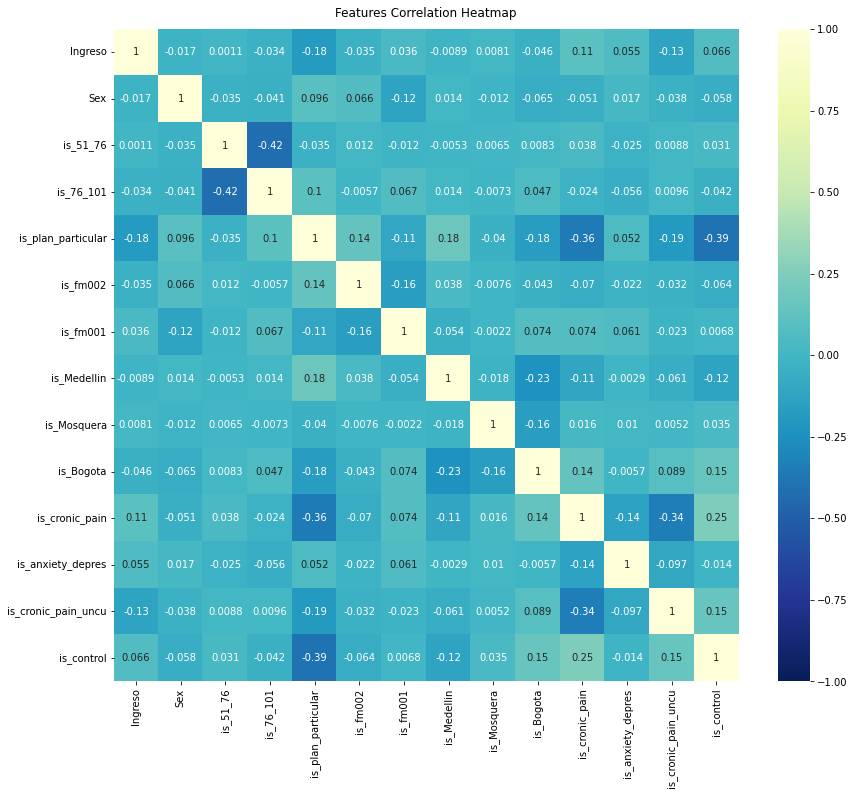

In [ ]:
# heatmap of features correlation

f, ax = plt.subplots(figsize=(14, 12))

# df of only features
df_corr = df_features_labels[df_features_labels.columns[:-1]]
sns.heatmap(df_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu_r')

plt.title('Features Correlation Heatmap', pad=12)

plt.show()

As can be seen in the Correlation Heatmap above, there is none or little *Multicolinearity* between the features, which makes it suitable for a Logistic Regression Model.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Logistic Regression Model

Supervised Classification Algorithm that uses regression to predict if a data sample belongs to a specific category or class. For this case it will classify a patient prescribed with FM as a buyer(1) or non_buyer(0)

- Calculate Log Odds >> the probability of a sample belonging to the positive class (patient bought FM precribed)
  - odds = P(event occurring) / P(event not occurring)
  - Z = b0 + b1x1 + ... bnXn

- Pass Log Odds to Sigmoid Function >> map Log Odds Z to the range [0, 1]
  - h(Z) = 1 / (1 + exp**-Z) 

### Features for the Model

In [ ]:
# features df
features = df_features_labels[['Sex', 'is_51_76', 'is_76_101', 'is_plan_particular', 'is_fm002',\
                               'is_fm001', 'is_Medellin', 'is_Mosquera', 'is_Bogota', 'is_cronic_pain',\
                               'is_anxiety_depres', 'is_cronic_pain_uncu', 'is_control']]
features.head()

,Sex,is_51_76,is_76_101,is_plan_particular,is_fm002,is_fm001,is_Medellin,is_Mosquera,is_Bogota,is_cronic_pain,is_anxiety_depres,is_cronic_pain_uncu,is_control
0,1,1,0,1,0,1,0,0,1,0,0,0,0
1,1,0,1,1,0,1,0,0,1,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,1,0,0,0,0
4,0,0,0,1,0,1,0,0,1,0,0,0,0


In [ ]:
# descriptive statistics of features
features.describe()

,Sex,is_51_76,is_76_101,is_plan_particular,is_fm002,is_fm001,is_Medellin,is_Mosquera,is_Bogota,is_cronic_pain,is_anxiety_depres,is_cronic_pain_uncu,is_control
count,35149.000000,35149.000000,35149.000000,35149.000000,35149.000000,35149.000000,35149.000000,35149.000000,35149.000000,35149.000000,35149.000000,35149.000000,35149.000000
mean,0.290535,0.533842,0.132436,0.386185,0.018948,0.561211,0.025719,0.011921,0.675695,0.326439,0.037640,0.193775,0.707815
std,0.454016,0.498861,0.338969,0.486881,0.136343,0.496246,0.158298,0.108531,0.468121,0.468917,0.190326,0.395260,0.454773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Labels for the Model

In [ ]:
# labels df
labels = df_features_labels[['FM_buyer']]

labels.head()

,FM_buyer
0,1
1,1
2,1
3,1
4,0


In [ ]:
# check labels shape
labels.shape

(35149, 1)

In [ ]:
# turn labels into numpy array
labels = np.array(labels)
labels

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
# change shape to (-1,) so it can be fed to the model
labels = labels.reshape(-1,)
labels.shape

(35149,)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Train Test Split

In [ ]:
# split data into train and test
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=100)

# check length of features_train and labels_train
print(f'features_train length: {len(features_train)}')
print(f'labels_train length: {len(labels_train)}', '\n')

# check length of features_test and labels_test
print(f'features_test length: {len(features_test)}')
print(f'labels_test length: {len(labels_test)}')

features_train length: 28119
labels_train length: 28119 

features_test length: 7030
labels_test length: 7030


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Model Creation

In [ ]:
from sklearn.linear_model import LogisticRegression

# create model
classifier = LogisticRegression()

# train model
classifier.fit(features_train, labels_train)

LogisticRegression()

In [ ]:
# get coefficients and intercept
coefficients = classifier.coef_
intercept = classifier.intercept_

# print values
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

Intercept: [0.12412922]
Coefficients: [[-0.05119571  0.37634591  0.64663589  0.98425602  0.00242318 -0.14542204
   0.23711704  0.28021317  0.22018345  0.55451556  0.3055848   0.29934143
   0.4427776 ]]


In [ ]:
# zip coefficients to features
list(zip(['Sex', 'is_51_76', 'is_76_101', 'is_plan_particular', 'is_fm002',\
         'is_fm001', 'is_Medellin', 'is_Mosquera', 'is_Bogota', 'is_cronic_pain',\
         'is_anxiety_depres', 'is_cronic_pain_uncu', 'is_control'], coefficients[0]))

[('Sex', -0.05119570881130318),
 ('is_51_76', 0.37634591449254545),
 ('is_76_101', 0.6466358946169066),
 ('is_plan_particular', 0.9842560218352566),
 ('is_fm002', 0.002423175801381454),
 ('is_fm001', -0.14542203961624373),
 ('is_Medellin', 0.2371170401490654),
 ('is_Mosquera', 0.28021317273965707),
 ('is_Bogota', 0.22018345082406576),
 ('is_cronic_pain', 0.554515561329401),
 ('is_anxiety_depres', 0.3055848039265667),
 ('is_cronic_pain_uncu', 0.2993414294901636),
 ('is_control', 0.44277760253934906)]

The features with the highest influence in classifying a patient with FM prescribed as a buyer (1) is **is_plan_particular** with a coefficient of 0.98 followed by **is_76_101** and **is_cronic_pain** with coefficients of 0.64 and 0.55 respectively.

In [ ]:
# predict features_test buyers
# threshold = 0.5 >> makes the decision on what class the sample belongs to
prediction = classifier.predict(features_test)

prediction

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# check to see if there are class 0 in prediction
for el in prediction:
  if el == 0:
    print(el)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


A threshold of p = 0.5 outputs almost all patients to class 1, this shows that the p is too small, the probability of a patient buying a prescribed FM must be higher

In [ ]:
# model accuracy on training data
train_score = classifier.score(features_train, labels_train)
print(f'Train Score: {train_score}')

# model accuracy on test data
test_score = classifier.score(features_test, labels_test)
print(f'Test score: {test_score}')

Train Score: 0.7942672214516875
Test score: 0.7988620199146514


The model has an Accuracy of 0.7988. This means that on average 79.88% of the times the classifier will correctly classify a new patient prescribed with FM as a buyer(1) or non_buyer(0)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Model Adjustment

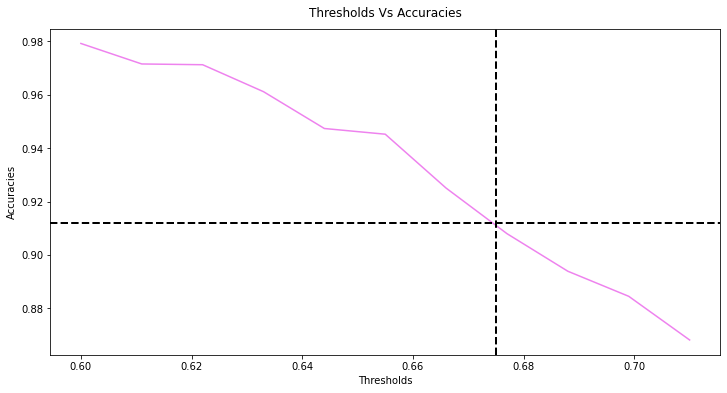

In [ ]:
# list to store thresholds
thresholds = []

# list to store accuracies
accuracies = []

# create range
x = np.linspace(0.6, 0.71, num=11)

for i in x:
  # store threshold
  thresholds.append(i)

  predict_thresh = (classifier.predict_proba(features_test)[:,1]>=i).astype(int)
  # calculate accuracy
  score = classifier.score(features_test, predict_thresh)
  accuracies.append(score)

# plot thresholds vs accuracies
f, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x=thresholds, y=accuracies, color='violet')
plt.axhline(0.912, linestyle='dashed', linewidth=2, color='black')
plt.axvline(0.675, linestyle='dashed', linewidth=2, color='black')


plt.xlabel('Thresholds')
plt.ylabel('Accuracies')
plt.title('Thresholds Vs Accuracies', pad=12)

plt.show()

In [ ]:
# increase the threshold of classification to 0.675
predict_new_threshold = (classifier.predict_proba(features_test)[:,1]>=0.675).astype(int)

predict_new_threshold

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# check number of non buyers predicted
sum = 0

for el in predict_new_threshold:
  if el == 0:
    sum+=1
    
print(sum)

639


In [ ]:
# calculate new accuracies with new threshold
test_score = classifier.score(features_test, predict_new_threshold)
print(f'Test Score: {test_score}')

Test Score: 0.9122332859174964


After the adjustment of the model, it has an accuracy of 0.91. This means an increase of 0.12 in accuracy, after changing the threshold from 0.5 to 0.675. The model now, on average, will classify correctly 91% of the times a new patient prescribed with FM as a buyer(1) or non_buyer(0).


In [ ]:
# vector of probabilities
probabilities  = classifier.predict_proba(features_test)

print('  Non_Buyer  |  Buyer   ')
# print first 20 probabilities
for i in range(0, 21):
  print(probabilities[i])


  Non_Buyer  |  Buyer   
[0.28069644 0.71930356]
[0.28095027 0.71904973]
[0.24745343 0.75254657]
[0.26562681 0.73437319]
[0.06869616 0.93130384]
[0.2072461 0.7927539]
[0.25535998 0.74464002]
[0.12183096 0.87816904]
[0.14961012 0.85038988]
[0.27368612 0.72631388]
[0.21613999 0.78386001]
[0.23215479 0.76784521]
[0.18471387 0.81528613]
[0.15213518 0.84786482]
[0.19254842 0.80745158]
[0.17185606 0.82814394]
[0.18471387 0.81528613]
[0.14537498 0.85462502]
[0.15213518 0.84786482]
[0.20939622 0.79060378]
[0.08841829 0.91158171]


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Confusion Matrix

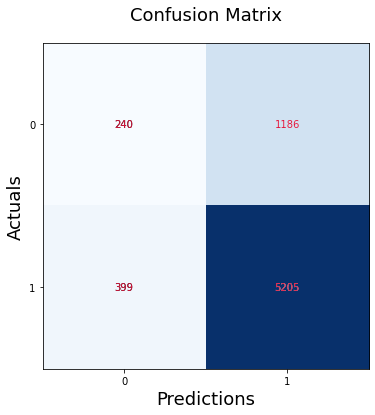

In [ ]:
# confusion matrix to compare the test labels to the prediction
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(labels_test, predict_new_threshold)

# plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6))
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)

# change color of occurences
for i in range(2):
  for e in range(2):
    ax.text(e, i, cm[i, e], ha='center', va='center', color='crimson')


plt.title('Confusion Matrix', fontsize=18)
plt.show()

- **True Positives >> 5205**
  - Number of times the model predicted the patient will buy the FM prescribed and he bought it

- **True Negatives >> 240**
  - Number of times the model predicted the patient wouldn't buy the FM prescribed and he didn't

- **False Positives >> 1186**
  - Number of times the model predicted the patient would buy the FM prescribed and he didn't

- **False Negatives >> 399**
  - Number of times the model predicted the patient wouldn't buy the FM prescribed and he did

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Recall, Precision & F1 Score

In [ ]:
# RECALL >> % of relevant items the classifier found
# true positives / (true positive + false negative)

recall = 5205 / (5205 + 399)
print(f'Recall: {recall}')

# PRECISION >> % of times the model predicted the patient will buy the FM presribed
# true positives / (true positives  + false positives)

precision = 5205 / (5205 + 1186)
print(f'Precision: {precision}')

# F1 SCORE >> shows the effectiveness of the classifier
# harmonic mean of precision and recall >> 2 * (precision * recall) / (precision + recall)

f1 = 2*(precision * recall) / (precision + recall)
print(f'F1 Score: {f1}')


Recall: 0.9288008565310493
Precision: 0.8144265373181035
F1 Score: 0.8678616090037515


- The RECALL of the classifier shows that on average it will find 92% of the times relevant items (patients who bought the FM prescribed).

- The PRECISION of the classifier shows that on average 81% of the times it will predict the patient will buy the prescribed FM

- The F1 SCORES shows that the classifier has an effectiveness on average of 86% in classifying correctly a patient prescribed with FM as a buyer or non_buyer

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Prediction of Future FM Buyers

### DB Connection

In [ ]:
# install ODBC driver
%%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
sudo apt-get update
sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17

OK
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 https://packages.microsoft.com/ubuntu/16.04/prod xenial InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/deadsnake

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key output should not be parsed (stdout is not a terminal)
100   983  100   983    0     0   3043      0 --:--:-- --:--:-- --:--:--  3043
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    79  100    79    0     0   1097      0 --:--:-- --:--:-- --:--:--  1097


In [ ]:
# install package to connect python to SQL server
!pip install pyodbc

In [ ]:
# import package
import pyodbc

# check for driver
pyodbc.drivers()

['ODBC Driver 17 for SQL Server']

In [ ]:
# save database info
server = 'goreplica.database.windows.net'
database = 'goMedisysCo_ILANS'
username = 'godbexternalilans'
password = 'G0ILANSExtern@l'

# establish connection
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get *Procedimientos Ordenados* for a Specific Date

In [ ]:
# function to get procedures
def get_procedures(year, month, day):

  # year >> in int form
  # month >> [1, 2, 3, ... 12]
  # day >> [1, 2, 3, ... 29, 30, 31]

  query = f"""SELECT DISTINCT
	Enc.identifier AS [Ingreso],
	2021 - YEAR(PatP.birthDate) AS [Edad],
	PatS.code AS [Sexo],
	City.name AS [CiudadMunicipio],
	DIAG.name AS [Diagnostico],
	CASE
		WHEN ContP.name LIKE '%ARL%' then 'ARL'
		WHEN ContP.name LIKE 'POLIC%' then 'Policia'
		WHEN ContP.name LIKE '%PLAN CORTESÍA%' then 'Cortesia'
		WHEN ContP.name LIKE '%PLAN MEMBRESÍA%' then 'Membresia'
		WHEN ContP.name LIKE '%PARTICULAR%' then 'Particular'
	ELSE 'EPS' END AS [Tipo Plan],
	FORMAT(Ev.actionRecordedDate, 'yyyy-MM-dd')  AS [FechaFormulacion],
	ProdG.code AS [CodProducto],
	EVForm.formulatedAmount AS [Cantidad],
  exType.itemName AS [tipo_examen]

  FROM EHREventFormulation AS EVForm WITH(NOLOCK)
    INNER JOIN EHREvents AS EV WITH(NOLOCK) ON EVForm.idEHREvent = EV.idEHREvent
    INNER JOIN users AS Pro WITH(NOLOCK) ON EVForm.idUserPractitioner = Pro.idUser  
    LEFT OUTER JOIN (userSystemSpecialities AS USpec WITH(NOLOCK) 
        INNER JOIN generalSpecialties AS Spec WITH(NOLOCK) ON USpec.idSpeciality = Spec.idSpecialty
            ) ON Pro.idUser = USpec.idUser
    LEFT OUTER JOIN (userSystemMRNumbers AS MR WITH(NOLOCK) 
        INNER JOIN generalInternalLists AS MRT WITH(NOLOCK) ON MR.idTypeMedicalRecord = MRT.idGeneralInternalList
            AND MRT.itemValue = 'R.M.'
            ) ON Pro.idUser = MR.idUser
    INNER JOIN encounters AS Enc WITH(NOLOCK) ON EV.idEncounter = Enc.idEncounter
    INNER JOIN users AS Pat WITH(NOLOCK) ON Enc.idUserPatient = Pat.idUser
    INNER JOIN userPeople AS PatP WITH(NOLOCK) ON Pat.idUser = PatP.idUser
	  INNER JOIN userConfAdministrativeSex AS PatS WITH(NOLOCK) ON PatP.idAdministrativeSex = PatS.idAdministrativeSex
    LEFT OUTER JOIN generalPoliticalDivisions AS City WITH(NOLOCK) ON PatP.idHomePlacePoliticalDivision = City.idPoliticalDivision
    LEFT OUTER JOIN generalPoliticalDivisions AS Neig WITH(NOLOCK) ON PatP.idHomePoliticalDivisionNeighborhood = Neig.idPoliticalDivision
    INNER JOIN userConfTypeDocuments AS DocT WITH(NOLOCK) ON Pat.idDocumentType = DocT.idTypeDocument
    INNER JOIN companyOffices AS Office WITH(NOLOCK) ON Enc.idOffice = Office.idOffice
    INNER JOIN encounterRecords AS EncR WITH(NOLOCK) ON Enc.idEncounter = EncR.idEncounter
    INNER JOIN users AS Ins WITH(NOLOCK) ON EncR.idPrincipalCOntractee = Ins.idUser
    INNER JOIN contracts AS Cont WITH(NOLOCK) ON EncR.idPrincipalContract = Cont.idContract
    INNER JOIN contractPlans AS ContP WITH(NOLOCK) ON EncR.idPrincipalPlan = ContP.idPlan
    INNER JOIN productGenerics AS ProdG WITH(NOLOCK) ON EVForm.idProductGeneric = ProdG.idGenericProduct
	  INNER JOIN productTypes AS PrType WITH(NOLOCK) ON ProdG.idProductType = prType.idProductType
    LEFT OUTER JOIN productGenericDrugs AS Drug WITH(NOLOCK) ON ProdG.idGenericProduct = Drug.idGenericProduct
    INNER JOIN generalMeasurementUnits AS GU WITH(NOLOCK) ON EVForm.idDoseUnit = GU.idUnit
    INNER JOIN EHRConfFormulationPeriodicity AS Per WITH(NOLOCK) ON EVForm.idPeriodicity = Per.idPeriodicity
    INNER JOIN productConfAdministrationRoute AS ARoute WITH(NOLOCK) ON EVForm.idAdministrationRoute = ARoute.idAdministrationRoute
	  INNER JOIN generalActions AS AC ON EV.idAction = AC.idAction
	  INNER JOIN dbo.encounters AS ENCO ON EV.idEncounter = ENCO.idEncounter
	  INNER JOIN dbo.encounterRecords AS ENCORE ON ENCO.idEncounter = ENCORE.idEncounter
	  LEFT OUTER JOIN dbo.diagnostics AS DIAG ON ENCORE.idFirstDiagnosis = DIAG.idDiagnostic
	  INNER JOIN dbo.healthServices AS HS ON ENCORE.idActualService = HS.idHealthService
	  LEFT OUTER JOIN generalMeasurementUnits AS AdminTime WITH(NOLOCK) ON EVForm.idAdministrationTime = AdminTime.idUnit AND AdminTime.type = 'T'
	  INNER JOIN userConfTypeDocuments AS DocType WITH(NOLOCK) ON Pro.idDocumentType = DocType.idTypeDocument

    LEFT OUTER JOIN appointments AS app WITH(NOLOCK) ON ENCO.idEncounter = app.idAdmission
	  LEFT OUTER JOIN generalInternalLists AS exType WITH(NOLOCK) ON app.idAppointmentExamType = exType.idGeneralInternalList

  WHERE  ProdG.idGenericProduct  IN ( 38591 , 38711 , 38712 , 38796, 39696) AND Enc.identifier != 1 AND EVForm.isSuspended != 1 AND Ac.name = 'Orden Médica (Formula Magistral)'
  AND YEAR(Ev.actionRecordedDate) = {year} AND MONTH(Ev.actionRecordedDate) = {month} AND DAY(Ev.actionRecordedDate) = {day}
  """

  # query to df
  df_proced = pd.read_sql_query(query, cnxn)

  # save date
  date = f'{year}-{month}-{day}'

  return df_proced, date
  

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Select Date

In [ ]:
# get procedures for 2021-month-day
df_date, date = get_procedures(2021, 11, 22)

In [ ]:
# check df
df_date

,Ingreso,Edad,Sexo,CiudadMunicipio,Diagnostico,Tipo Plan,FechaFormulacion,CodProducto,Cantidad,tipo_examen
0,239502,70,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,Particular,2021-11-22,fm001,1,Control
1,243790,38,F,SOACHA,"TRASTORNO DE DISCO LUMBAR YOTROS, CON RADICULO...",EPS,2021-11-22,fm001,3,Control
2,243963,43,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,EPS,2021-11-22,fm001,1,Control
3,244421,86,F,BOGOTÁ D.C.,None,EPS,2021-11-22,fm001,2,Control
4,244870,59,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,EPS,2021-11-22,fm003,1,Control
...,...,...,...,...,...,...,...,...,...,...
280,249611,42,F,BOGOTÁ D.C.,None,EPS,2021-11-22,fm001,3,Control
281,249615,70,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,Particular,2021-11-22,fm001,3,Control
282,249617,53,M,BOGOTÁ D.C.,TRASTORNO MIXTO DE ANSIEDAD YDEPRESION,Particular,2021-11-22,fm004,1,Primera vez
283,249620,65,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,EPS,2021-11-22,fm001,2,Control


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Encode Date Features

In [ ]:
def feature_encoding(df):
  # remove duplicates >> Not Necessary SELECT DISTINCT brings unique records by formulation
  # df = df.drop_duplicates(subset=['Ingreso'])

  # change FechaFormulacion to datetime
  df['FechaFormulacion'] = pd.to_datetime(df['FechaFormulacion'])

  # Sex encoding >> F=0, M=1
  df['Sex'] = [1 if df.loc[index, 'Sexo'] == 'M' else 0 for index in df.index] 

  # is_plan_particular >> Particular=1
  df['is_plan_particular'] = [1 if df.loc[index, 'Tipo Plan'] == 'Particular' else 0 for index in df.index]

  # is_fm002 (THC)
  df['is_fm002'] = [1 if df.loc[index, 'CodProducto'] == 'fm002' else 0 for index in df.index]
  # is_fm001 (CBD)
  df['is_fm001'] = [1 if df.loc[index, 'CodProducto'] == 'fm001' else 0 for index in df.index]

  # is_Medellin
  df['is_Medellin'] = [1 if df.loc[index, 'CiudadMunicipio'] == 'MEDELLÍN' else 0 for index in df.index]
  # is_Mosquera
  df['is_Mosquera'] = [1 if df.loc[index, 'CiudadMunicipio'] == 'MOSQUERA' else 0 for index in df.index]
  # is_Bogota
  df['is_Bogota'] = [1 if df.loc[index, 'CiudadMunicipio'] == 'BOGOTÁ D.C.' else 0 for index in df.index]

  # other_cronic_pain
  df['is_cronic_pain'] = [1 if df.loc[index, 'Diagnostico'] == 'OTRO DOLOR CRONICO' else 0 for index in df.index]
  # is_anxiety_depression
  df['is_anxiety_depres'] = [1 if df.loc[index, 'Diagnostico'] == 'TRASTORNO MIXTO DE ANSIEDAD YDEPRESION' else 0\
                                 for index in df.index]
  # is_cronic_pain_uncu
  df['is_cronic_pain_uncu'] = [1 if df.loc[index, 'Diagnostico'] == 'DOLOR CRONICO INTRATABLE' else 0 for index in df.index]


  # is_51_76
  df['is_51_76'] = [1 if df.loc[index, 'Edad'] >= 51 and df.loc[index, 'Edad'] <= 76 else 0 for index in df.index]
  # is_76_101
  df['is_76_101'] = [1 if df.loc[index, 'Edad'] >= 76 and df.loc[index, 'Edad'] <= 101 else 0 for index in df.index]

  # is_control
  df['is_control'] = [1 if df.loc[index, 'tipo_examen'] == 'Control' else 0 for index in df.index]

  return df


In [ ]:
# return df for the specified date with the features encoded
df_date_raw = feature_encoding(df_date)

In [ ]:
# select only the encoded features
features_encoded_date = df_date_raw[['Sex', 'is_51_76', 'is_76_101', 'is_plan_particular', 'is_fm002',\
                                     'is_fm001', 'is_Medellin', 'is_Mosquera', 'is_Bogota', 'is_cronic_pain',\
                                    'is_anxiety_depres', 'is_cronic_pain_uncu', 'is_control']]

features_encoded_date

,Sex,is_51_76,is_76_101,is_plan_particular,is_fm002,is_fm001,is_Medellin,is_Mosquera,is_Bogota,is_cronic_pain,is_anxiety_depres,is_cronic_pain_uncu,is_control
0,0,1,0,1,0,1,0,0,1,1,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,1,1,0,0,1
3,0,0,1,0,0,1,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,0,0,0,0,0,1,0,0,1,0,0,0,1
281,0,1,0,1,0,1,0,0,1,1,0,0,1
282,1,1,0,1,0,0,0,0,1,0,1,0,0
283,0,1,0,0,0,1,0,0,1,1,0,0,1


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Prediction of Patients who are Going to Buy FMs Prescribed

In [ ]:
# prediction with classification threshold >= 0.675
  # 1 >> patient is classified as a buyer 
  # 0 >> patient is classified as a non_buyer
prediction_new_date = (classifier.predict_proba(features_encoded_date)[:,1]>=0.675).astype(int)

prediction_new_date

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

In [ ]:
# vector of probabilities for the procedures of the day
probabilities = classifier.predict_proba(features_encoded_date)

print('         Non_Buyer   |  Buyer   ')
probabilities

In [ ]:
# add the predictions to the df_date_raw procedures 
df_date_raw['FM_buyer'] = prediction_new_date
# select un-encoded features
df_date_raw = df_date_raw[['Ingreso', 'Edad', 'Sexo', 'CiudadMunicipio', 'Diagnostico', 'Tipo Plan',\
                           'FechaFormulacion', 'CodProducto', 'Cantidad', 'tipo_examen', 'FM_buyer']]

# change column names to fit postgres table
df_date_raw = df_date_raw.rename(columns={'Ingreso': 'ingreso',
                                          'Edad': 'edad',
                                          'Sexo': 'sexo',
                                          'CiudadMunicipio': 'ciudad_municipio',
                                          'Diagnostico': 'diagnostico',
                                          'Tipo Plan': 'tipo_plan',
                                          'FechaFormulacion': 'fecha_formulacion',
                                          'CodProducto': 'cod_producto',
                                          'Cantidad': 'cantidad',
                                          'tipo_examen': 'tipo_examen',
                                          'FM_buyer': 'fm_buyer'})


In [ ]:
# number of prescriptions
num_prescrip = len(df_date_raw)
# predicted buyers
num_buyers = len(df_date_raw[df_date_raw['fm_buyer'] == 1])
# patient purchase rate
patient_purchase_rate = round((num_buyers / num_prescrip) * 100, 2)


# number of FMs_prescribed
fms_prescribed = df_date_raw.cantidad.sum()
# number of predicted FMs bought
fms_predict = df_date_raw.cantidad[df_date_raw['fm_buyer'] == 1].sum()
# FMs purchase rate
fms_purchase_rate = round((fms_predict / fms_prescribed) * 100, 2)


print(f'Procedimientos Ordenados: {date}', '\n')

print(f'Number of Patient Prescriptions: {num_prescrip}')
print(f'Number of Predicted Buyers: {num_buyers}')
print(f'Patient Purchase Rate: {patient_purchase_rate}%', '\n')

print(f'Number of FMs prescribed: {fms_prescribed}')
print(f'Number of Predicted FMs bought: {fms_predict}')
print(f'FMs Purchase Rate: {fms_purchase_rate}%', '\n')

df_date_raw.head(9)

Procedimientos Ordenados: 2021-11-22 

Number of Patient Prescriptions: 285
Number of Predicted Buyers: 255
Patient Purchase Rate: 89.47% 

Number of FMs prescribed: 558
Number of Predicted FMs bought: 490
FMs Purchase Rate: 87.81% 



,ingreso,edad,sexo,ciudad_municipio,diagnostico,tipo_plan,fecha_formulacion,cod_producto,cantidad,tipo_examen,fm_buyer
0,239502,70,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,Particular,2021-11-22,fm001,1,Control,1
1,243790,38,F,SOACHA,"TRASTORNO DE DISCO LUMBAR YOTROS, CON RADICULO...",EPS,2021-11-22,fm001,3,Control,0
2,243963,43,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,EPS,2021-11-22,fm001,1,Control,1
3,244421,86,F,BOGOTÁ D.C.,None,EPS,2021-11-22,fm001,2,Control,1
4,244870,59,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,EPS,2021-11-22,fm003,1,Control,1
5,245243,68,M,SOACHA,OTRO DOLOR CRONICO,EPS,2021-11-22,fm001,2,Control,1
6,246615,47,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,EPS,2021-11-22,fm001,2,Control,1
7,246627,40,M,BOGOTÁ D.C.,OTRO DOLOR CRONICO,EPS,2021-11-22,fm003,1,Control,1
8,246737,43,M,GUASCA,OTRO DOLOR CRONICO,EPS,2021-11-22,fm001,1,Primera vez,0


In [ ]:
# export df_date_raw to csv
file_name = f'Next_Buyers_FMs_{date}.csv'

df_date_raw.to_csv(file_name, index=False, encoding='utf-8-sig')

In [ ]:
# close cursor and connection
cursor.close()
cnxn.close()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Connecting to PostGres

### Installation

In [ ]:
# install postgres
!apt install postgresql postgresql-contrib &>log
!service postgresql start
!sudo -u postgres psql -c "CREATE USER root WITH SUPERUSER"
# set connection
%load_ext sql
%config SqlMagic.feedback=False 
%config SqlMagic.autopandas=True
%sql postgresql+psycopg2://@/postgres

 * Starting PostgreSQL 10 database server
   ...done.
ERROR:  role "root" already exists


/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


'Connected: @postgres'

In [ ]:
# import psycopg2 to connect to Postgres
import psycopg2

params = {
    "host"      : "khcosbdp1.postgres.database.azure.com",
    "database"  : "DEVKHIRON",
    "user"      : "administrador@khcosbdp1",
    "password"  : "F1l1p1n4#-2"
}

def connect(params):
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
         
    return conn

cnxn = connect(params)

Connecting to the PostgreSQL database...


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Insert Predictions to PostGres Table

In [ ]:
# initialize cursor
cursor = cnxn.cursor()

# iterate through each record in df_date_raw and execute query
for row in df_date_raw.itertuples():
  cursor.execute('INSERT INTO "SKHIRON"."F_Predict_Bu_K"(ingreso,edad,sexo,ciudad_municipio,diagnostico,tipo_plan,fecha_formulacion,cod_producto,cantidad,tipo_examen,fm_buyer) VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)',\
                 (row.ingreso, row.edad, row.sexo, row.ciudad_municipio, row.diagnostico, row.tipo_plan, row.fecha_formulacion, row.cod_producto, row.cantidad, row.tipo_examen, row.fm_buyer))

cnxn.commit()


In [ ]:
# test that table in postgres has inserted values
df_pg_test = pd.read_sql('SELECT * FROM "SKHIRON"."F_Predict_Bu_K"', cnxn)
df_pg_test.tail()

,ingreso,edad,sexo,ciudad_municipio,diagnostico,tipo_plan,fecha_formulacion,cod_producto,cantidad,tipo_examen,fm_buyer
1616,249611.0,42,F,BOGOTÁ D.C.,None,EPS,2021-11-22,fm001,3,Control,0
1617,249615.0,70,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,Particular,2021-11-22,fm001,3,Control,1
1618,249617.0,53,M,BOGOTÁ D.C.,TRASTORNO MIXTO DE ANSIEDAD YDEPRESION,Particular,2021-11-22,fm004,1,Primera vez,1
1619,249620.0,65,F,BOGOTÁ D.C.,OTRO DOLOR CRONICO,EPS,2021-11-22,fm001,2,Control,1
1620,249624.0,88,M,BOGOTÁ D.C.,OTRO DOLOR CRONICO,EPS,2021-11-22,fm001,1,Control,1


In [ ]:
# close cursor & connection
cursor.close()
cnxn.close()


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)